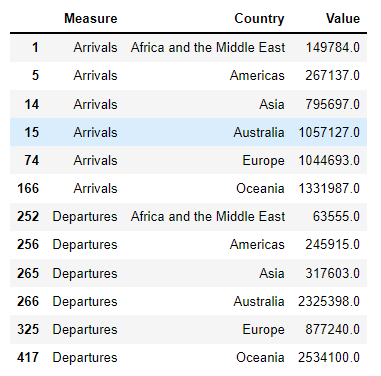

In [10]:

# Sankey diagrams are commonly used to display the flow of some property from one source to another. This type of
# chart has various arrows representing the flow of property from one source to another and the size of an arrow 
# is proportional to the amount of property flowing from source to destination. Sankey diagrams are commonly used 
# for purposes like population migration, website user journey, the flow of energy, the flow of other properties 
# (oil, gas, etc.), and many more.

import pandas as pd
import numpy as np

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

df = pd.read_csv("C:\\your_path_here\\migration.csv")
df.head()

df = df[df["Measure"]!="Net"]
df = df[~df["Country"].isin(["Not stated", "All countries"])]
migration_grouped = df.groupby(by=["Measure","Country"]).sum()[["Value"]]
migration_grouped = migration_grouped.reset_index()
migration_grouped.head()

continents = ["Asia", "Australia","Africa and the Middle East","Europe", "Americas", "Oceania"]
continent_wise_migration = migration_grouped[nz_migration_grouped.Country.isin(continents)]
continent_wise_migration

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'C:\\your_path_here\\'
Image(filename = PATH + "dataframe.png", width=400, height=400)


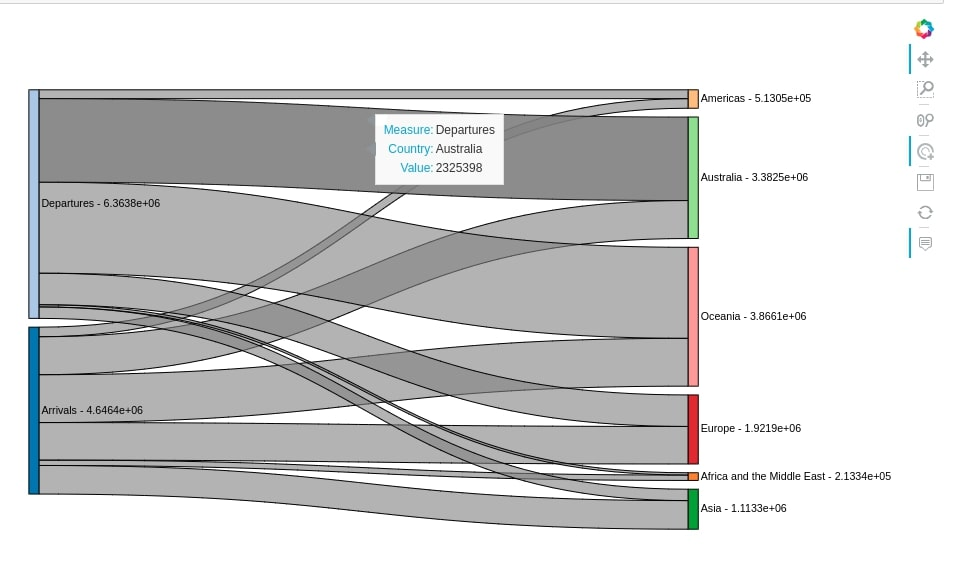

In [14]:

hv.Sankey(continent_wise_migration)

Image(filename = PATH + "sankey1.png", width=800, height=800)


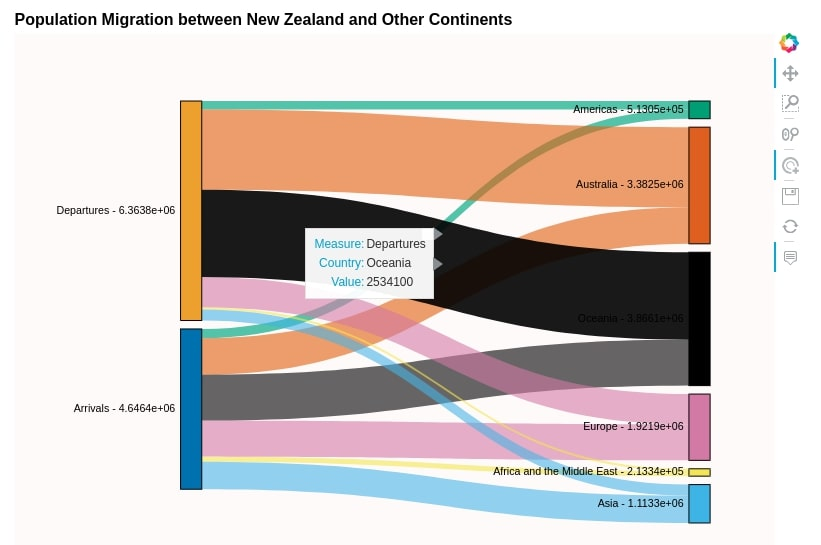

In [15]:

sankey1 = hv.Sankey(continent_wise_migration, kdims=["Measure", "Country"], vdims=["Value"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color='Country', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=800, height=600, bgcolor="snow",
                                 title="Population Migration between New Zealand and Other Continents")

Image(filename = PATH + "sankey2.png", width=800, height=800)


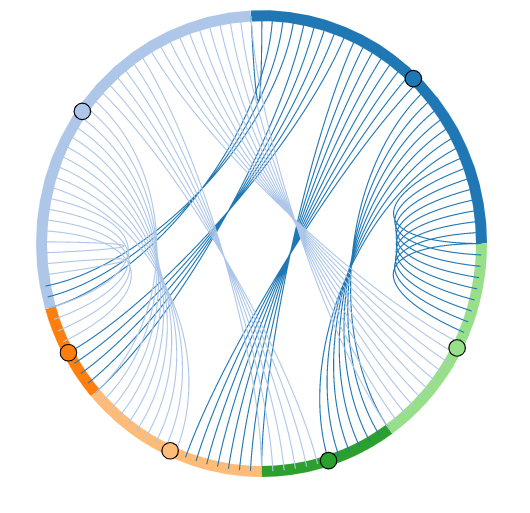

In [17]:

# The chord diagram is a data visualization technique used to show the relationship between various data attributes. 
# It organizes data attributes radially in a circle and the between attributes is shown by drawing arcs between them. 
# When graphs have many arcs between points then it can make visualization look messy. The chord diagram can bundle 
# these arcs using a technique called hierarchical edge bundling which creates an arc between two data attributes 
# and the size of arc varies based on a number of connections between them.

import pandas as pd
import numpy as np
import warnings
from holoviews import opts, dim

warnings.filterwarnings("ignore")
pd.set_option("max_columns", 30)

import holoviews as hv
hv.extension("bokeh")

hv.extension("matplotlib")
hv.output(fig='svg', size=250)

# conver to categories; numberics
df_fin = pd.DataFrame({col: continent_wise_migration[col].astype('category').cat.codes for col in continent_wise_migration}, index=continent_wise_migration.index)
df_fin.head(10)

chord = hv.Chord(df_fin).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', 
               edge_color=dim('Measure').str(), 
               labels='Country', 
               node_color=dim('index').str()))

Image(filename = PATH + "chord1.png", width=600, height=600)


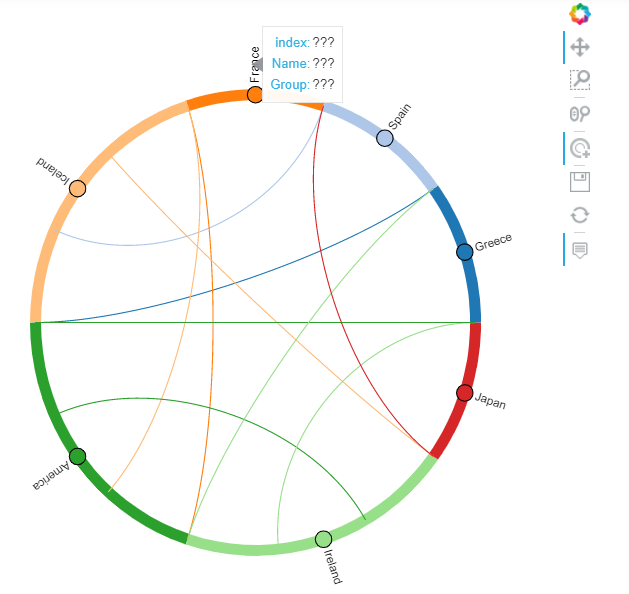

In [18]:

# finally...here is another dataframe and another way to setup a Chord Diagram
# this version of a Chord Diagram has more details and it is much easier to interpret than the version directly above.

import pandas as pd
from pandas import DataFrame


# Intitialise data of lists
data = [{'Measure': 'Arrivals', 'Country':'Greece', 'Value':'1590'}, 
       {'Measure': 'Arrivals', 'Country':'Spain', 'Value':'1455'},
       {'Measure': 'Arrivals', 'Country':'France', 'Value':'1345'}, 
       {'Measure': 'Arrivals', 'Country':'Iceland', 'Value':'1100'},
       {'Measure': 'Arrivals', 'Country':'Iceland', 'Value':'1850'},
       {'Measure': 'Departures', 'Country':'America', 'Value':'2100'}, 
       {'Measure': 'Departures', 'Country':'Ireland', 'Value':'1000'},
       {'Measure': 'Departures', 'Country':'America', 'Value':'950'}, 
       {'Measure': 'Departures', 'Country':'Ireland', 'Value':'1200'},
       {'Measure': 'Departures', 'Country':'Japan', 'Value':'1050'},]
df = pd.DataFrame(data)
df

_list = list(df.Country.values)
new_df = pd.DataFrame({'From':_list, 'To':_list[3:]+_list[:3], 'Value':df.Value})

node = pd.DataFrame()
for i, value in enumerate(df.Measure.unique()):
    _list = list(df[df['Measure']==value].Country.unique())
    node = pd.concat([node, pd.DataFrame({'Name':_list, 'Group':i})], ignore_index=True)

values = list(df.Country.unique())
d = {value: i for i, value in enumerate(values)}

def str2num(s):
    return d[s]

new_df.From = new_df.From.apply(str2num)
new_df.To = new_df.To.apply(str2num)

hv.Chord(new_df)
nodes = hv.Dataset(pd.DataFrame(node), 'index')
chord = hv.Chord((new_df, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('From').str(), 
               labels='Name', node_color=dim('index').str()
              )
)

Image(filename = PATH + "chord2.png", width=600, height=600)


In [7]:

# the data is sourced from here.
# https://www.kaggle.com/timoboz/migration-nz
